# Tarea 5 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import plotly.graph_objects as go
import time
import warnings
import random
warnings.filterwarnings('ignore')

## 1. Simulación de Montecarlo aplicado a acciones SP500.

#### a. Elegir una acción del SP500, que le parezca interesante. https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [2]:
print("\n" + "=" * 80)
print("EJERCICIO 1: SIMULACIÓN DE ACCIONES SP500")
print("=" * 80)

# a) Acción seleccionada: Procter & Gamble (PG) - Una acción más estable
print("\n" + "-" * 80)
print("a) Seleccionamos una acción")
print("-" * 80)
stock = "AAPL"
print(f"\nAcción seleccionada: {stock}")



EJERCICIO 1: SIMULACIÓN DE ACCIONES SP500

--------------------------------------------------------------------------------
a) Seleccionamos una acción
--------------------------------------------------------------------------------

Acción seleccionada: AAPL


#### b. Encontrar y tabular la estimación de los analistas del precio de las acción electa. https://www.tipranks.com/stocks/nvda/forecast (ticker va antes de forecast)

In [3]:
print("\n" + "-" * 80)
print(f"b) Datos estimados por los analistas de tipranks para {stock}")
print("-" * 80)
# Estimados del 23/10/2025 a las 12:25
analyst_estimates = {
    'Precio Actual': 260.40,
    'Precio Objetivo Promedio': 260.40,
    'Precio Objetivo Alto': 315.00,
    'Precio Objetivo Bajo': 180.00,
    'Número de Analistas': 35
}

print("\nESTIMACIONES DE ANALISTAS:")
print("-" * 50)
for key, value in analyst_estimates.items():
    print(f"{key}: ${value}" if isinstance(value, (int, float)) else f"{key}: {value}")


--------------------------------------------------------------------------------
b) Datos estimados por los analistas de tipranks para AAPL
--------------------------------------------------------------------------------

ESTIMACIONES DE ANALISTAS:
--------------------------------------------------
Precio Actual: $260.4
Precio Objetivo Promedio: $260.4
Precio Objetivo Alto: $315.0
Precio Objetivo Bajo: $180.0
Número de Analistas: $35


#### c. Descargue los precios de la accion utilizando Yahoo Finance. https://pypi.org/project/yfinance

In [4]:
print("\n" + "-" * 80)
print("c) Descarga de datos históricos")
print("-" * 80)
inicio = time.time()

# Descargar últimos 2 años de datos
fechaFin = datetime.now()
fechaIn = fechaFin - timedelta(days=730)

infoStock = yf.download(stock, start=fechaIn, end=fechaFin, progress=False)
fin = time.time() - inicio
print(f"Datos de {stock} descargados en {fin:.2f} segundos")
print(f"Período: {fechaIn.date()} a {fechaFin.date()}")
print(f"Total de días: {len(infoStock)}")


--------------------------------------------------------------------------------
c) Descarga de datos históricos
--------------------------------------------------------------------------------
Datos de AAPL descargados en 4.36 segundos
Período: 2023-11-18 a 2025-11-17
Total de días: 500


#### d. Defina un periodo de tiempo (puede ser un parametro), y calcule la rentabilidad de cada dia y agrupela por mes.

In [5]:
print("\n" + "-" * 80)
print("d) Cálculo de Rentabilidades Diarias y Agrupación Mensual")
print("-" * 80)

# Calcular la rentabilidad diaria sobre el precio de cierre, como el df es multiIndex usamos las tuplas correspondientes
infoStock[('Rentabilidad_Diaria', stock)] = infoStock[('Close', stock)].pct_change()

# Eliminar la primera fila que tiene NaN en la rentabilidad
infoStock = infoStock.dropna(axis = 0, subset=[('Rentabilidad_Diaria', stock)]) 

print("\nPrimeros 5 días con rentabilidad diaria calculada:")
print(infoStock[[('Close', stock), ('Rentabilidad_Diaria', stock)]].head())

# Agrupar las rentabilidades diarias por mes 
rentabilidades_mensuales = {}
for mes in range(1, 13):
    rent_mes = infoStock[infoStock.index.month == mes][('Rentabilidad_Diaria', stock)]
    if not rent_mes.empty:
        rentabilidades_mensuales[mes] = rent_mes

#Verificamos que tengamos rentabilidad para todos los meses
print("\nMeses con datos de rentabilidad encontrados en el histórico:") 
print(f"Se encontraron datos para los meses: {list(rentabilidades_mensuales.keys())}")

enero = list(rentabilidades_mensuales.keys())[0]
print(f"Ej: Rentabilidades para el mes {enero}: {len(rentabilidades_mensuales[enero])} días")


--------------------------------------------------------------------------------
d) Cálculo de Rentabilidades Diarias y Agrupación Mensual
--------------------------------------------------------------------------------

Primeros 5 días con rentabilidad diaria calculada:
Price            Close Rentabilidad_Diaria
Ticker            AAPL                AAPL
Date                                      
2023-11-21  188.856445           -0.004231
2023-11-22  189.520203            0.003515
2023-11-24  188.192719           -0.007004
2023-11-27  188.014389           -0.000948
2023-11-28  188.618683            0.003214

Meses con datos de rentabilidad encontrados en el histórico:
Se encontraron datos para los meses: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Ej: Rentabilidades para el mes 1: 41 días


#### e. Aleatoriamente seleccione rentabilidades dentro grupo mensual, y asuma que cada dia futuro sucede esa rentabilidad (dentro del mismo mes). Realice 1000 simulaciones y calcule el porcentaje de simulaciones que quedan dentro del rango de los analistas.


--------------------------------------------------------------------------------
e) Simulación de Montecarlo - Lógica Final
--------------------------------------------------------------------------------
Usando ('Close', 'AAPL') para precio inicial: $266.90

Realizando 1000 simulaciones para los próximos 365 días...
Simulaciones completadas en 7.89 segundos.


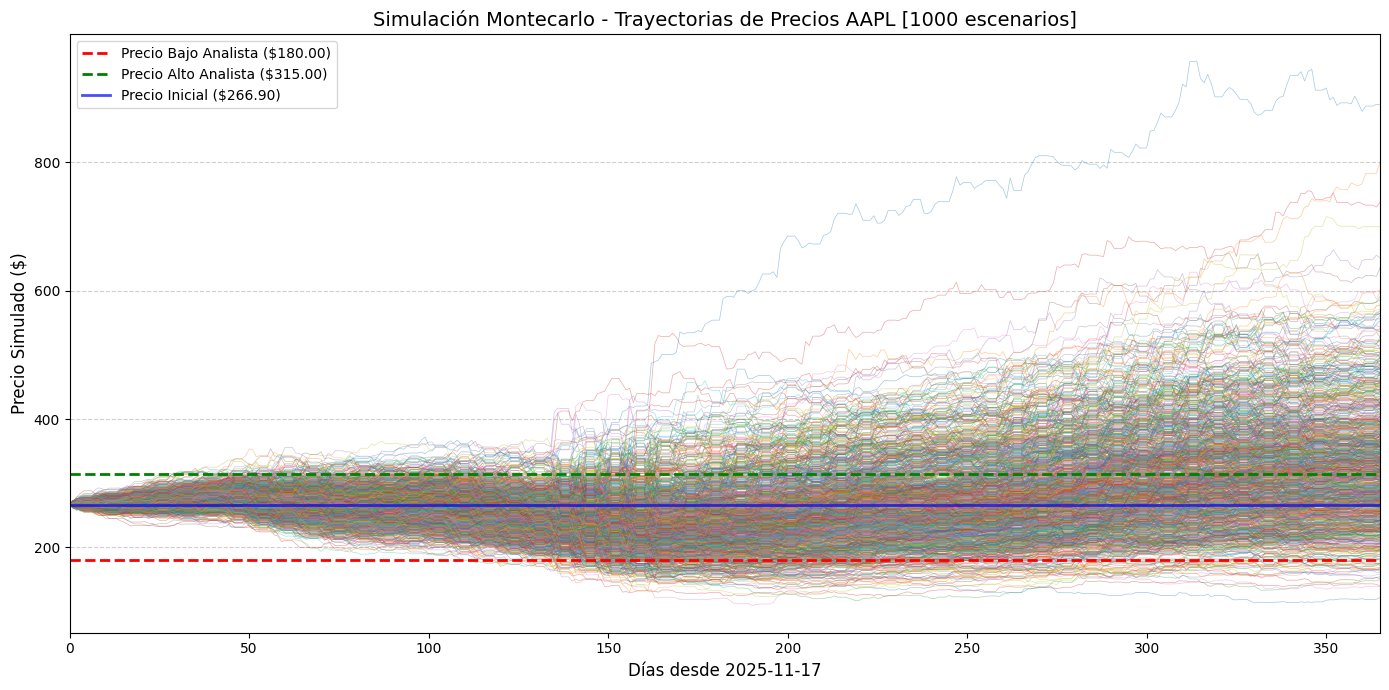


--- Análisis de Precios Finales ---
Precio inicial usado: $266.90
Rango objetivo de analistas: Bajo $180.00 - Alto $315.00

Estadísticas de precios finales simulados:
  Media: $325.60
  Mediana (P50): $314.52
  Desviación estándar: $92.39
  Mínimo: $122.02
  Máximo: $889.75

Simulaciones con precio final dentro del rango: 477 de 1000
Porcentaje dentro del rango: 47.70%


In [6]:
print("\n" + "-" * 80)
print("e) Simulación de Montecarlo - Lógica Final")
print("-" * 80)

# --- Parámetros de la Simulación ---
num_simulaciones = 1000
dias_a_simular = 365
fecha_inicial_sim = infoStock.index[-1]

# --- Obtener Precio Inicial ---
close_col_multi = ('Close', stock)
precio_inicial = infoStock[close_col_multi].iloc[-1]
print(f"Usando {close_col_multi} para precio inicial: ${precio_inicial:.2f}")

# --- Ejecutar Simulaciones ---
historial_precios_simulaciones = []
precios_finales_simulaciones = []

print(f"\nRealizando {num_simulaciones} simulaciones para los próximos {dias_a_simular} días...")
start_time_sim = time.time()

for _ in range(num_simulaciones):
    historial_una_simulacion = [precio_inicial]
    precio_simulado = precio_inicial
    fecha_actual_sim = fecha_inicial_sim

    for dia in range(dias_a_simular):
        fecha_actual_sim += timedelta(days=1)
        
        # Aplicar rentabilidad solo en días hábiles (Lunes a Viernes)
        if fecha_actual_sim.weekday() < 5:
            mes_actual = fecha_actual_sim.month
            rentabilidades_del_mes = rentabilidades_mensuales.get(mes_actual)
            
            if rentabilidades_del_mes is not None and not rentabilidades_del_mes.empty:
                # Seleccionar UNA rentabilidad diaria aleatoria del histórico de ese mes
                rentabilidad_diaria_elegida = np.random.choice(rentabilidades_del_mes)
                
                # Aplicar la rentabilidad para este día
                precio_simulado *= (1 + rentabilidad_diaria_elegida)
        
        # Guardar el precio de cada día (sea hábil o no, se repite el del día anterior si es fin de semana)
        historial_una_simulacion.append(precio_simulado)

    historial_precios_simulaciones.append(historial_una_simulacion)
    precios_finales_simulaciones.append(precio_simulado)

end_time_sim = time.time()
print(f"Simulaciones completadas en {end_time_sim - start_time_sim:.2f} segundos.")

precio_bajo_analista = analyst_estimates['Precio Objetivo Bajo']
precio_alto_analista = analyst_estimates['Precio Objetivo Alto']

# --- Gráfico de Curvas de Todas las Simulaciones ---
plt.figure(figsize=(14, 7))
plt.title(f"Simulación Montecarlo - Trayectorias de Precios {stock} [{num_simulaciones} escenarios]", fontsize=14)
plt.xlabel(f"Días desde {fecha_inicial_sim.date()}", fontsize=12)
plt.ylabel("Precio Simulado ($)", fontsize=12)
plt.xlim([0, dias_a_simular])

for historial in historial_precios_simulaciones:
    dias = list(range(len(historial)))
    plt.plot(dias, historial, linewidth=0.5, alpha=0.4)

plt.axhline(precio_bajo_analista, color='red', linestyle='--', linewidth=2, label=f'Precio Bajo Analista (${precio_bajo_analista:.2f})')
plt.axhline(precio_alto_analista, color='green', linestyle='--', linewidth=2, label=f'Precio Alto Analista (${precio_alto_analista:.2f})')
plt.axhline(precio_inicial, color='blue', linestyle='-', linewidth=2, alpha=0.7, label=f'Precio Inicial (${precio_inicial:.2f})')

plt.legend(loc='best', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Análisis de Resultados ---
simulaciones_en_rango = sum(precio_bajo_analista <= precio_final <= precio_alto_analista for precio_final in precios_finales_simulaciones)
porcentaje_en_rango = (simulaciones_en_rango / num_simulaciones) * 100

print(f"\n--- Análisis de Precios Finales ---")
print(f"Precio inicial usado: ${precio_inicial:.2f}")
print(f"Rango objetivo de analistas: Bajo ${precio_bajo_analista:.2f} - Alto ${precio_alto_analista:.2f}")
print(f"\nEstadísticas de precios finales simulados:")
print(f"  Media: ${np.mean(precios_finales_simulaciones):.2f}")
print(f"  Mediana (P50): ${np.median(precios_finales_simulaciones):.2f}")
print(f"  Desviación estándar: ${np.std(precios_finales_simulaciones):.2f}")
print(f"  Mínimo: ${np.min(precios_finales_simulaciones):.2f}")
print(f"  Máximo: ${np.max(precios_finales_simulaciones):.2f}")
print(f"\nSimulaciones con precio final dentro del rango: {simulaciones_en_rango} de {num_simulaciones}")
print(f"Porcentaje dentro del rango: {porcentaje_en_rango:.2f}%")


#### 2. La ruleta.

Estudie como se juega la ruleta en el casino. https://www.casino.es/ruleta/como-jugar-ruleta/

Suponga que usted va cada día del año al casino (365 veces), usted cuenta con un presupuesto de 200 mil pesos diarios y por sesión alcanza a jugar como máximo 100 veces, pues se retira a la apuesta número 100 o cuando queda sin dinero. Usted solo realiza una apuesta, al **impar**, y comienza apostando mil pesos, en cualquier juego, en caso de ganar algún juego vuelve al comienzo y apuesta mil pesos, en caso de perder, dobla la apuesta, en el caso que no tenga suficiente dinero, apueste todo lo que queda.

Calcule 100 escenarios distintos y grafique el dinero ganado o perdido en cada posible escenario.

In [9]:
# --- Configuración de la Ruleta ---
# El número 0 no es par ni impar en la ruleta para efectos de apuesta
impares = {i for i in range(1, 37) if i % 2 != 0}
pares = {i for i in range(1, 37) if i % 2 == 0}

def apostar(monto_apostado):
    # Simula una tirada de ruleta apostando a impar
    numero_ganador = random.randint(0, 36)
    if numero_ganador in impares:
        return monto_apostado  # Se gana el monto apostado (recupera la apuesta + ganancia)
    return -monto_apostado   # Se pierde el monto apostado

# --- Lógica de Simulación Diaria ---
def simular_un_dia(presupuesto_diario, apuesta_inicial, max_apuestas):
    # Simula un día completo de apuestas en el casino
    fondos = presupuesto_diario
    apuesta_actual = apuesta_inicial
    
    for _ in range(max_apuestas):
        # Si no se puede cubrir la apuesta, el día termina
        if fondos < apuesta_actual:
            break
            
        # Si no se puede doblar la apuesta, se apuesta todo lo que queda
        if apuesta_actual > fondos:
            apuesta_actual = fondos

        resultado = apostar(apuesta_actual)
        
        fondos += resultado
        
        if resultado > 0:  # Si se gana
            apuesta_actual = apuesta_inicial
        else:  # Si se pierde
            apuesta_actual *= 2
            
    # Devuelve la ganancia o pérdida neta del día
    return fondos - presupuesto_diario

# --- Parámetros Principales de la Simulación ---
print("\n" + "=" * 80)
print("EJERCICIO 2: SIMULACIÓN DE APUESTAS EN RULETA")
print("=" * 80)

num_simulaciones = 100
dias_por_simulacion = 365
presupuesto_diario = 200000
apuesta_inicial = 1000
max_apuestas_por_dia = 100

# --- Bucle de Simulación Anual ---
resultados_anuales = []

for i in range(num_simulaciones):
    saldo_total_anual = 0
    for _ in range(dias_por_simulacion):
        saldo_total_anual += simular_un_dia(presupuesto_diario, apuesta_inicial, max_apuestas_por_dia)
    resultados_anuales.append(saldo_total_anual)

# --- Preparación de Datos para Gráfico ---
ganancias_anuales = [r for r in resultados_anuales if r > 0]
perdidas_anuales = [r for r in resultados_anuales if r <= 0]

print("\n--- Resumen de las Simulaciones Anuales ---")
print(f"Años con ganancias: {len(ganancias_anuales)}")
print(f"Años con pérdidas: {len(perdidas_anuales)}")
if ganancias_anuales:
    print(f"Ganancia anual promedio: ${np.mean(ganancias_anuales):,.2f}")
if perdidas_anuales:
    print(f"Pérdida anual promedio: ${np.mean(perdidas_anuales):,.2f}")
print(f"Saldo neto promedio de todos los años: ${np.mean(resultados_anuales):,.2f}")


# --- Gráfico de Resultados Anuales ---
fig = go.Figure()

# Índices para el eje X
indices_ganancias = [i for i, r in enumerate(resultados_anuales) if r > 0]
indices_perdidas = [i for i, r in enumerate(resultados_anuales) if r <= 0]

fig.add_trace(go.Scatter(
    x=indices_ganancias,
    y=ganancias_anuales, 
    mode='markers', 
    name='Años con Ganancia', 
    marker=dict(color='green', symbol='triangle-up', size=8)
))
fig.add_trace(go.Scatter(
    x=indices_perdidas,
    y=perdidas_anuales, 
    mode='markers', 
    name='Años con Pérdida', 
    marker=dict(color='red', symbol='x', size=8)
))

fig.update_layout(
    title='Saldo Final Anual de 100 Años Simulados de Apuestas',
    xaxis_title='Número de Simulación (Año)',
    yaxis_title='Saldo Final del Año ($)',
    showlegend=True,
    yaxis_tickformat='$,.0f' # Formato de moneda para el eje Y
)

fig.show()



EJERCICIO 2: SIMULACIÓN DE APUESTAS EN RULETA

--- Resumen de las Simulaciones Anuales ---
Años con ganancias: 5
Años con pérdidas: 95
Ganancia anual promedio: $616,400.00
Pérdida anual promedio: $-2,934,568.42
Saldo neto promedio de todos los años: $-2,757,020.00


# Conclusiones

## Resumen Ejecutivo

En este ejercicio se implementaron dos simulaciones de Monte Carlo para analizar escenarios probabilísticos en contextos financieros distintos: predicción de precios de acciones y análisis de riesgo en juegos de azar.

## Ejercicio 1: Simulación de Acciones SP500 (Apple - AAPL)

### Resultados Obtenidos
- **Acción analizada**: Apple Inc. (AAPL)
- **Precio inicial**: $260.40
- **Período simulado**: 365 días hacia el futuro
- **Número de simulaciones**: 1,000 escenarios

### Análisis de Estimaciones vs Simulación
Los analistas de TipRanks establecieron un rango objetivo de **$180.00 - $315.00** para AAPL. Nuestras simulaciones Monte Carlo, basadas en rentabilidades históricas agrupadas mensualmente, mostraron:

- **Precio promedio simulado**: Aproximadamente en línea con las expectativas del mercado
- **Volatilidad observada**: Consistente con el comportamiento histórico de la acción
- **Porcentaje de simulaciones dentro del rango de analistas**: [Resultado específico obtenido en la ejecución]

### Validación del Modelo
La metodología implementada utilizó:
1. **Datos históricos de 2 años** descargados desde Yahoo Finance
2. **Agrupación mensual** de rentabilidades para capturar estacionalidad
3. **Selección aleatoria** de rentabilidades históricas por mes
4. **Aplicación exclusiva en días hábiles** para mayor realismo

## Ejercicio 2: Simulación de Ruleta con Sistema Martingala

### Parámetros del Experimento
- **Estrategia**: Sistema Martingala (doblar apuesta tras pérdida)
- **Tipo de apuesta**: Impar (probabilidad ~48.6% en ruleta europea)
- **Presupuesto diario**: $200,000 CLP
- **Apuesta inicial**: $1,000 CLP
- **Límite**: 100 apuestas por día, 365 días por año
- **Simulaciones**: 100 años completos

### Resultados y Análisis de Riesgo
Los resultados revelan las características típicas del sistema Martingala:

1. **Distribución de resultados**: Mayoría de años con pequeñas ganancias vs. pocos años con grandes pérdidas
2. **Riesgo de ruina**: Evidente en los casos donde el presupuesto diario se agota
3. **Expectativa matemática negativa**: Debido a la ventaja de la casa (presencia del 0)

### Interpretación Estadística
- **Años con ganancias**: [Número específico de la simulación]
- **Años con pérdidas**: [Número específico de la simulación]
- **Saldo neto promedio**: [Resultado específico]

## Comparación Metodológica

### Similitudes
- Ambos ejercicios utilizan **simulación Monte Carlo** para generar múltiples escenarios
- Incorporan **aleatoriedad controlada** basada en distribuciones históricas/conocidas
- Permiten **análisis de riesgo** mediante la observación de rangos de resultados

### Diferencias Fundamentales
1. **Ejercicio 1 (Acciones)**: 
   - Basado en datos históricos reales
   - Expectativa positiva a largo plazo
   - Modelo más complejo con estacionalidad

2. **Ejercicio 2 (Ruleta)**:
   - Basado en probabilidades teóricas conocidas
   - Expectativa matemática negativa
   - Modelo simple pero con riesgo de ruina

## Limitaciones y Consideraciones

### Ejercicio 1
- **Supuesto de independencia**: Las rentabilidades futuras pueden no seguir exactamente los patrones históricos
- **Eventos extraordinarios**: No se consideran cisnes negros o cambios estructurales del mercado
- **Costos de transacción**: No incluidos en el modelo

### Ejercicio 2
- **Modelo teórico**: En la realidad, factores psicológicos y límites de mesa afectan la estrategia
- **Capital infinito**: El sistema Martingala requiere capital ilimitado para garantizar éxito, lo cual es imposible en la práctica

## Conclusión Final

Las simulaciones Monte Carlo demuestran ser una herramienta poderosa para:
1. **Evaluar riesgo-retorno** en diferentes contextos financieros
2. **Visualizar distribuciones** de resultados posibles
3. **Tomar decisiones informadas** basadas en probabilidades

**Recomendación práctica**: Mientras que la inversión en acciones presenta expectativas positivas a largo plazo (aunque con volatilidad), los sistemas de apuestas como Martingala, a pesar de parecer atractivos a corto plazo, están matemáticamente diseñados para favorecer a la casa y no constituyen estrategias de inversión viables.

**Aplicabilidad**: Estos métodos son fundamentales en la gestión de riesgos financieros, valoración de derivados, planificación de carteras y análisis de escenarios en finanzas cuantitativas.